In [418]:
import scipy as py
import pandas as pd
import matplotlib.pyplot as plt

#### Matplotlib: This assignment is for visualization using matplotlib:
###### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [419]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [420]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

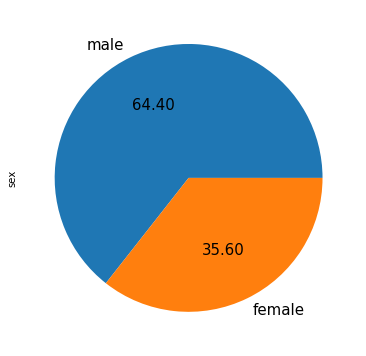

In [421]:
titanic.sex.value_counts().plot.pie(figsize = (6, 12), fontsize = 15, autopct = '%.2f')
plt.show()

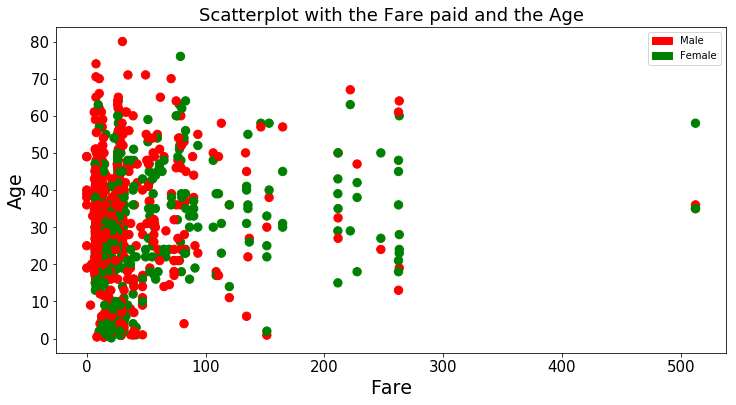

In [422]:
colors = {'male':'red', 'female':'green'}
titanic1=titanic[['fare','age','sex']].dropna()

aplot = titanic1.plot.scatter('fare', 'age', s = 70,c = titanic1['sex'].apply(lambda x : colors[x]), 
                      figsize=(12,6), fontsize = 15, legend = True)
plt.xlabel("Fare", fontsize=19)
plt.ylabel("Age", fontsize=19)
plt.title("Scatterplot with the Fare paid and the Age", fontsize=18)

import matplotlib.patches as mpatches
Male = mpatches.Patch(color='red', label='Male')
Female = mpatches.Patch(color='green', label='Female')
plt.legend(handles=[Male, Female])


plt.show()

### Scipy:

###### We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
###### Task:   1.fitting it to the periodic function           2.plot the fit
###### Data          #Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25                #Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

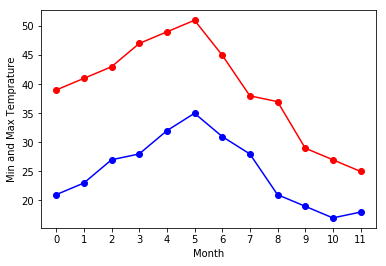

In [379]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

tem_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
tem_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.linspace(0,12, num = 12)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))

plt.plot(tem_max, 'ro-')

plt.plot(tem_min, 'bo-')

plt.xticks(np.arange(12))

plt.ylabel("Min and Max Temprature")
plt.xlabel("Month")

plt.show()

In [380]:
### defining the Periodic function
# a,b,c  - are  parameters
# x is independent parameter

from scipy import optimize
def fun_periodic(x, a, b, c):
    return (a + b *(( np.cos((x + c) * 2 * np.pi / x.max()))))

In [381]:
##fitting the curve to get the parameters for minimized residual error
min_params, min_cov = optimize.curve_fit(fun_period, month, tem_min)
max_params, max_cov = optimize.curve_fit(fun_period, month, tem_max)

In [382]:
max_params

array([39.88861733, 10.59083165, -4.54505284])

In [383]:
##prediction
pred_min = fun_periodic(month, *min_params)
pred_max = fun_periodic(month, *max_params)

pred_max

array([32.22520935, 37.39389897, 43.35464405, 48.21495013, 50.43170438,
       49.30110299, 45.1821039 , 39.38246023, 33.74351787, 30.05560116,
       29.48959761, 32.22520935])

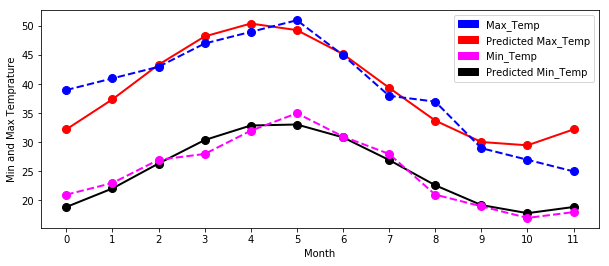

In [415]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.plot(pred_max, color='red', marker='o', linestyle='solid',linewidth=2, markersize=8)

plt.plot(pred_min, color='black', marker='o', linestyle='solid',linewidth=2, markersize=8)

plt.plot(tem_max, color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=8)

plt.plot(tem_min, color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=8)

plt.xticks(np.arange(12))

plt.ylabel("Min and Max Temprature")
plt.xlabel("Month")

import matplotlib.patches as mpatches
max_tem = mpatches.Patch(color='blue', label='Max_Temp')
max_tem_predicted = mpatches.Patch(color='red', label='Predicted Max_Temp')

min_tem = mpatches.Patch(color='magenta', label='Min_Temp')
min_tem_predicted = mpatches.Patch(color='black', label='Predicted Min_Temp')

plt.legend(handles=[max_tem,max_tem_predicted,min_tem, min_tem_predicted])


plt.show()